# Computer Vision

## Torchvision Module

[torchvision.datasets](https://pytorch.org/vision/stable/datasets.html)
> many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more.
  - [making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets)

[torchvision.models](https://pytorch.org/vision/stable/models.html)
> well-performing and commonly used computer vision model architectures implemented in PyTorch

[torchvision.transforms](https://pytorch.org/vision/stable/transforms.html)
> Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here

[torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#module-torch.utils.data)
> Creates a Python iteralbe over a dataset 

# Import Module

In [1]:
# import Pytorch
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

#Check version
#Note: your Pytorch version shouldn't be lower
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

# 학습에 사용할 CPU나 GPU 장치를 얻습니다.
device = "cuda" if torch.cuda.is_available() else "cpu"


PyTorch version: 1.13.1+cu116
torchvision version: 0.14.1+cu116


In [2]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import torchinfo

In [4]:
import os, random
import numpy as np
import pandas as pd

SEED = 42

def reset_seeds(seed):
  random.seed(seed)
  os.environ['PYTHONHASHSEED'] = str(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.backends.cudnn.deterministic = True

reset_seeds(SEED)  

# Getting a dataset

- [torchvision.datasets.FashionMNIST()](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html)  
To download it, we provide the fillowing parameters:
  - `root: str` which folder do you want to dwonload the data to?
  - `train: Bool` do you want the training or test split? 
  - `download: Bool` should the data be downloaded? 
  - `transform: torchvision.transforms` what transformations would you like to do on the data?

In [6]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [9]:
image, label = train_data[0]

In [10]:
image.shape

torch.Size([1, 28, 28])

# EDA

In [11]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

image shape: torch.Size([1, 28, 28])


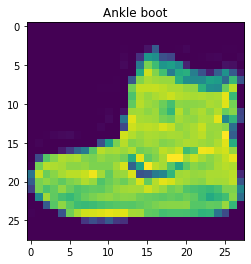

In [12]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label]);

In [13]:
image.squeeze().shape, image.shape

(torch.Size([28, 28]), torch.Size([1, 28, 28]))

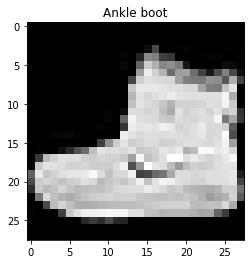

In [14]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

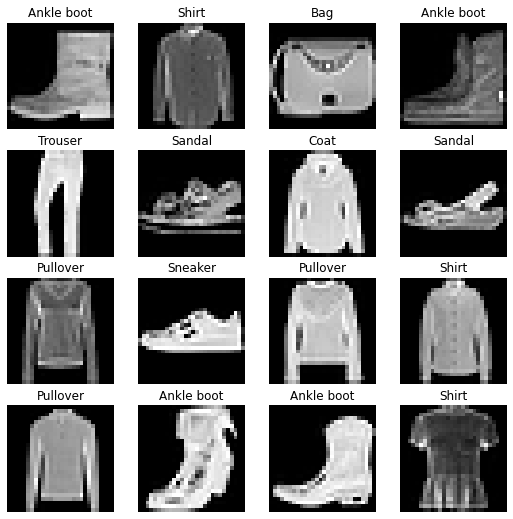

In [15]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

# Prepare DataLoader

It turns a large `Dataset` into a Python iterable of smaller chunks. These smaller chunks are called batches or mini-batches and can be set by the `batch_size` parameter.  

What's a good batch size?  
`32 is a good place to start` for a fair amount of problems. But since this is a value you can set (a hyperparameter) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512) 


In [17]:
from torch.utils.data import DataLoader

#Setup the batch size hyperparameter
BATCH_SIZE = 32

#Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True
)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False
                             )

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f1f52e1a6d0>, <torch.utils.data.dataloader.DataLoader object at 0x7f1f52e1a7c0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


# Check out data inside dataloader

In [18]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))

# shape: [batch_size=32, color_channels=1,height=28, width=28]
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


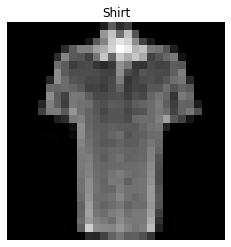

In [19]:
# Show a sample
torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");

print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# 1.Baseline Model

In [21]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
train_input = train_features_batch[0]

# Flatten the sample
flatten_output = flatten_model(train_input) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {train_input.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {flatten_output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [22]:
# Create a linear layer
linear_model = nn.Linear(in_features=784, out_features=10)

linear_output = linear_model(flatten_output)

print(f"Shape before linear: {flatten_output.shape} -> [color_channels, height*width]")
print(f"Shape after linear: {linear_output.shape} -> [color_channels, 10]")

Shape before linear: torch.Size([1, 784]) -> [color_channels, height*width]
Shape after linear: torch.Size([1, 10]) -> [color_channels, 10]


# Build a baseline model

In [23]:
from torch import nn

class BaselineModel(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)  

In [24]:
torch.manual_seed(SEED)

# Need to setup model with input parameters
baseline_model = BaselineModel(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hiden layer
    output_shape=len(class_names) # one for every class
)
baseline_model.to(device) # keep mod

BaselineModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [27]:
torchinfo.summary(baseline_model,(32, 1, 28, 28)) # [batch_size, color_channels, height, width]

Layer (type:depth-idx)                   Output Shape              Param #
BaselineModel                            [32, 10]                  --
├─Sequential: 1-1                        [32, 10]                  --
│    └─Flatten: 2-1                      [32, 784]                 --
│    └─Linear: 2-2                       [32, 10]                  7,850
│    └─Linear: 2-3                       [32, 10]                  110
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
Total mult-adds (M): 0.25
Input size (MB): 0.10
Forward/backward pass size (MB): 0.01
Params size (MB): 0.03
Estimated Total Size (MB): 0.14

### Setup loss, optimizer and evaluation metrics

In [25]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [26]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy()

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=baseline_model.parameters(), lr=0.1)

### Creating a function to time out experiments

In [28]:
from timeit import default_timer as default_timer

def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### Creating a training loop and training a model on batches of data
1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss per batch
3. Loop through testing batches, perform testing steps, calcuate the test loss per batch
4. Print out what's happening
5. Time it all

#### [optimizer.zero_grad(), loss.backward(), optimizer.step()](https://gaussian37.github.io/dl-pytorch-snippets/#optimizerzero_grad-lossbackward-optimizerstep-1)
- `optimizer.zero_grad()`
> 이전 step에서 각 layer 별로 계산된 gradient 값을 모두 0으로 기화 시키는 작업이다. 0으로 초기화 하지 않으면 이전 step의 결과에 현재 step의 gradient 누적으로 합해져서 계산되어 집니다.   
- `loss.backward()`
> 각 layer의 파라미터에 대하여 back-propagation을 통해 gradient를 계산합니다.   
- `optimizer.step()`
> 각 layer의 파라미터와 같이 저장된 gradient 값을 이용하여 파라미터를 업데이트 합니다. 이 명령어를 통해 파라미터가 업데이트되어 모델의 성능이 개선됩니다.

### training and testing

In [ ]:
# import tqdm for progress bar
from tqdm.auto import torch

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# 2.Non Linear Model

### Build a better model with non-linearity
We'll do a similar model to before, except this time we'll put non-linear functions(`nn.ReLU()`) in between each linear layer.

In [51]:
# Create a model with non-linear and linear layers
class NonLinearModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(), # activate function
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU() # activate function
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [52]:
torch.manual_seed(SEED)

non_linear_model = NonLinearModel(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) 

In [53]:
next(non_linear_model.parameters()).device

device(type='cpu')

In [54]:
non_linear_model

NonLinearModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [56]:
torchinfo.summary(non_linear_model,(32, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
NonLinearModel                           [32, 10]                  --
├─Sequential: 1-1                        [32, 10]                  --
│    └─Flatten: 2-1                      [32, 784]                 --
│    └─Linear: 2-2                       [32, 10]                  7,850
│    └─ReLU: 2-3                         [32, 10]                  --
│    └─Linear: 2-4                       [32, 10]                  110
│    └─ReLU: 2-5                         [32, 10]                  --
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
Total mult-adds (M): 0.25
Input size (MB): 0.10
Forward/backward pass size (MB): 0.01
Params size (MB): 0.03
Estimated Total Size (MB): 0.14

In [58]:
# baseline model
torchinfo.summary(baseline_model,(32, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
BaselineModel                            [32, 10]                  --
├─Sequential: 1-1                        [32, 10]                  --
│    └─Flatten: 2-1                      [32, 784]                 --
│    └─Linear: 2-2                       [32, 10]                  7,850
│    └─Linear: 2-3                       [32, 10]                  110
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
Total mult-adds (M): 0.25
Input size (MB): 0.10
Forward/backward pass size (MB): 0.01
Params size (MB): 0.03
Estimated Total Size (MB): 0.14

In [60]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=non_linear_model.parameters(), 
                            lr=0.1)

In [61]:
def train_step(model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                accuracy_fn,
                device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [62]:
def test_step(data_loader: torch.utils.data.DataLoader,
                model: torch.nn.Module,
                loss_fn: torch.nn.Module,
                accuracy_fn,
                device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

#3. CNN Model

[nn.Conv2d(in_channels, out_channels, kernel_size)](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)  
- `stride`: controls the stride for the cross-correlation, a single number or a tuple.
- `padding`: controls the amount of padding applied to the input. 
- `dilation`: controls the spacing between the kernel points

- O : Size of output image
- I : Size of input image
- K : Size of kernels used in the Conv layer
- N : number of kernels
- S : Stride of the convolution operation
- P : padding size

- O = (I - K + 2P / S) + 1

In [30]:
# With square kernels and equal stride
m = nn.Conv2d(16, 33, 3, stride=2)
input = torch.randn(20, 16, 50, 100)
m(input).shape

torch.Size([20, 33, 24, 49])

In [31]:
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
input = torch.randn(20, 16, 50, 100)
m(input).shape

torch.Size([20, 33, 26, 100])

[nn.MaxPool2d()](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)
- `kernel_size`: the size of the window to take a max over 
- `stride`: the stride of the window. Default value is `kernel_size` 

In [32]:
#pool of square window of size=3, stride=2
m = nn.MaxPool2d(3, stride=2)
input = torch.randn(20, 16, 50, 32)
m(input).shape

torch.Size([20, 16, 24, 15])

In [33]:
m = nn.MaxPool2d((3, 2), stride=(2, 1))
input = torch.randn(20, 16, 50, 32)
m(input).shape 

torch.Size([20, 16, 24, 31])

#Build CNN Model

In [36]:
# Create a convolutional neural network 
class CNNModel(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                    out_channels=hidden_units, 
                    kernel_size=3, # how big is the square that's going over the image?
                    stride=1, # default
                    padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                        out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [37]:
torch.manual_seed(SEED)

cnn_model = CNNModel(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)

cnn_model

CNNModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

아래 summary를 보면 cnn model의 파라미터양이 더 적은 것을 알 수 있다.   
이것을 통해 nn.Linear보다 nn.Conv2d의 모델 학습량이 훨씬 더 적다는 것을 알 수 있다.    

In [38]:
torchinfo.summary(cnn_model, (32, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [32, 10]                  --
├─Sequential: 1-1                        [32, 10, 14, 14]          --
│    └─Conv2d: 2-1                       [32, 10, 28, 28]          100
│    └─ReLU: 2-2                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-3                       [32, 10, 28, 28]          910
│    └─ReLU: 2-4                         [32, 10, 28, 28]          --
│    └─MaxPool2d: 2-5                    [32, 10, 14, 14]          --
├─Sequential: 1-2                        [32, 10, 7, 7]            --
│    └─Conv2d: 2-6                       [32, 10, 14, 14]          910
│    └─ReLU: 2-7                         [32, 10, 14, 14]          --
│    └─Conv2d: 2-8                       [32, 10, 14, 14]          910
│    └─ReLU: 2-9                         [32, 10, 14, 14]          --
│    └─MaxPool2d: 2-10                   [32, 10, 7, 7]            --
├─Sequentia

# Stepping through training of CNN Model

In [39]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))

In [41]:
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [42]:
input_shape = 1
hidden_units = 10

block_1 = nn.Sequential(
    nn.Conv2d(in_channels=input_shape,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2,
                 stride=2)          
)

In [43]:
block_1_out = block_1(train_features_batch)

In [44]:
block_1_out.shape

torch.Size([32, 10, 14, 14])

In [46]:
block_2 = nn.Sequential(
    nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
    nn.ReLU(),
    nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2)
)

In [47]:
# x = self.block_2(x)
block_2_out = block_2(block_1_out)
block_2_out.shape 

torch.Size([32, 10, 7, 7])

In [48]:
output_shape = len(class_names)

classifier = nn.Sequential(
                nn.Flatten(),
                # Where did this in_features shape come from? 
                # It's because each layer of our network compresses and changes the shape of our inputs data.
                nn.Linear(in_features=hidden_units*7*7, 
                        out_features=output_shape)
            )

In [49]:
out = classifier(block_2_out)
out.shape

torch.Size([32, 10])

### Setup a loss function and optimizer

In [50]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=cnn_model.parameters(), 
                            lr=0.1)

In [ ]:
torch.manual_seed(SEED)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=cnn_model, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=cnn_model,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_cnn_model = print_train_time(start=train_time_start_model_2,
                                                end=train_time_end_model_2,
                                                device=device)

## Evaluate trained Model

In [ ]:
# Get cnn_model results 
cnn_model_results = eval_model(
    model=cnn_model,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

cnn_model_results

# 4.Compare model results and training

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([baseline_model_results, non_linear_model_results, cnn_model_results])

#6. Making a confusion matrix for further prediction evalution

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                        target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);